In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import datetime

%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
import plotly.tools as tls
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

In [2]:
url = 'https://covidtracking.com/api/v1/states/daily.csv'
statesdf = pd.read_csv(url)

In [3]:
statesdf.head()

date state  positive  negative  pending  hospitalizedCurrently  \
0  20200623    AK     778.0   92169.0      NaN                   14.0   
1  20200623    AL   31097.0  322941.0      NaN                  680.0   
2  20200623    AR   16678.0  247814.0      NaN                  248.0   
3  20200623    AS       0.0     174.0      NaN                    NaN   
4  20200623    AZ   58179.0  382339.0      NaN                 2136.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                  2521.0             NaN            737.0   
2                  1188.0             NaN              NaN   
3                     NaN             NaN              NaN   
4                  4255.0           614.0              NaN   

   onVentilatorCurrently  ...  posNeg  deathIncrease hospitalizedIncrease  \
0                    1.0  ...   92947              0                    0   
1                    NaN  ...  354038             23                   50   
2                   57.0  ...  264492             10                   24   
3                    NaN  ...     174              0                    0   
4                  386.0  ...  440518             42                    0   

                                       hash commercialScore  \
0  f35d9d60a800f017ff47a041f47e0d05531a0a5d               0   
1  d0d195d69fd8e81e5ab80f001a6c0919dbdcf204               0   
2  85ada121319e67e007e948504ed59ad41d6e8df9               0   
3  0d9d878b490e6460c45ff06c325b3f28f1419ee8               0   
4  d80761e660fa46dfc4d7747eba8a6bcb8216783c               0   

  negativeRegularScore  negativeScore  positiveScore score  grade  
0                    0              0              0     0    NaN  
1                    0              0              0     0    NaN  
2                    0              0              0     0    NaN  
3                    0              0              0     0    NaN  
4                    0              0              0     0    NaN  

[5 rows x 39 columns]

In [4]:
population={'CA': 39512223,'TX': 28995881,'FL':21477737,'NY':19453561,'PA':12801989,'IL':12671821,'OH':11689100,'GA':10617423,
        'NC':10488084,'MI':9986857,'NJ':8882190,'VA':8535519,'WA': 7614893,'AZ':7278717,'MA': 6892503,'TN':6829174,'IN':6732219,
        'MO':6137428,'MD':6045680,
           'WI':5822434,'CO':5758736,'MN':5639632,'SC':5148714,'AL':4903185,'LA':4648794,'KY':4467673,'OR':4217737,
           'OK':3956971,'CT':3565287,'UT':3205958,'IA':3155070,'NV':3080156,'AR':3017804,'MS':2976149,'KS':2913314,
           'NM':2096829,'NE':1934408,'WV':1792147,'ID':1787065,'HI':1415872,'NH':1359711,'ME':1344212,'MT':1068778,
           'RI':1059361,'DE':973764,'SD':884659,'ND':762062,'AK':731545,'DC':705749,'VT':623989,'WY':578759,'AS':55219,
           'GU':168428,'MP':57479,'PR':2877629, 'VI':30184}

currentdate=datetime.datetime.now()

#Source: World Atlas.
#AS:  55219, worldometers

stayhomeorder={'AL':{'start':datetime.datetime(2020, 4, 4),'end':datetime.datetime(2020, 4, 30)}, 
               'AK':{'start':datetime.datetime(2020, 3, 28),'end':datetime.datetime(2020, 4, 24)}, 
               'AZ':{'start':datetime.datetime(2020, 3, 31),'end':datetime.datetime(2020, 5, 15)},
               'CA':{'start':datetime.datetime(2020, 3, 19),'end':datetime.datetime(2020, 5, 8)},
               'CO':{'start':datetime.datetime(2020, 3, 26),'end':datetime.datetime(2020, 4, 27)},
               'CT':{'start':datetime.datetime(2020, 3, 23),'end':datetime.datetime(2020, 5, 20)},
               'DE':{'start':datetime.datetime(2020, 3, 24),'end':datetime.datetime(2020, 6, 1)},
               'DC':{'start':datetime.datetime(2020, 4, 1),'end':datetime.datetime(2020, 6, 8)},
               'FL':{'start':datetime.datetime(2020, 4, 3),'end':datetime.datetime(2020, 5, 1)},
               'GA':{'start':datetime.datetime(2020, 4, 3),'end':datetime.datetime(2020, 4, 24)},
               'HI':{'start':datetime.datetime(2020, 3, 25),'end':datetime.datetime(2020, 5, 5)},
               'ID':{'start':datetime.datetime(2020, 3, 25),'end':datetime.datetime(2020, 5, 1)},
               'IL':{'start':datetime.datetime(2020, 3, 21),'end':datetime.datetime(2020, 5, 30)},
               'IN':{'start':datetime.datetime(2020, 3, 24),'end':datetime.datetime(2020, 5, 4)},
               'KS':{'start':datetime.datetime(2020, 3, 30),'end':datetime.datetime(2020, 5, 4)},
               'KY':{'start':datetime.datetime(2020, 3, 26),'end':datetime.datetime(2020, 5, 11)},
               'LA':{'start':datetime.datetime(2020, 3, 23),'end':datetime.datetime(2020, 5, 15)},
               'ME':{'start':datetime.datetime(2020, 4, 2),'end':datetime.datetime(2020, 5, 31)},
               'MD':{'start':datetime.datetime(2020, 3, 30),'end':datetime.datetime(2020, 5, 15)},
               'MA':{'start':datetime.datetime(2020, 3, 24),'end':datetime.datetime(2020, 5, 18)},
               'MI':{'start':datetime.datetime(2020, 3, 24),'end':datetime.datetime(2020, 5, 7)},
               'MN':{'start':datetime.datetime(2020, 3, 27),'end':datetime.datetime(2020, 4, 27)},
               'MS':{'start':datetime.datetime(2020, 4, 3),'end':datetime.datetime(2020, 4, 27)},
               'MO':{'start':datetime.datetime(2020, 4, 6),'end':datetime.datetime(2020, 5, 4)},
               'MT':{'start':datetime.datetime(2020, 3, 28),'end':datetime.datetime(2020, 4, 26)},
               'NV':{'start':datetime.datetime(2020, 4, 1),'end':datetime.datetime(2020, 5, 1)},
               'NH':{'start':datetime.datetime(2020, 3, 27),'end':datetime.datetime(2020, 5, 4)},
               'NJ':{'start':datetime.datetime(2020, 3, 21),'end':currentdate},
               'NM':{'start':datetime.datetime(2020, 3, 23),'end':datetime.datetime(2020, 5, 16)},
               'NY':{'start':datetime.datetime(2020, 3, 22),'end':datetime.datetime(2020, 5, 15)},
               'NC':{'start':datetime.datetime(2020, 3, 30),'end':datetime.datetime(2020, 5, 8)},
               'OH':{'start':datetime.datetime(2020, 3, 23),'end':datetime.datetime(2020, 5, 4)},
               'OK':{'start':datetime.datetime(2020, 3, 24),'end':datetime.datetime(2020, 5, 24)},
               'OR':{'start':datetime.datetime(2020, 3, 23),'end':datetime.datetime(2020, 5, 15)},
               'PA':{'start':datetime.datetime(2020, 4, 1),'end':datetime.datetime(2020, 5, 8)},
               'PR':{'start':datetime.datetime(2020, 3, 15),'end':datetime.datetime(2020,5, 4)},
               'RI':{'start':datetime.datetime(2020, 3, 28),'end':datetime.datetime(2020, 5, 9)},
               'SC':{'start':datetime.datetime(2020, 4, 7),'end':datetime.datetime(2020, 5, 4)},
               'TN':{'start':datetime.datetime(2020, 3, 31),'end':datetime.datetime(2020, 4, 27)},
               'TX':{'start':datetime.datetime(2020, 4, 2),'end':datetime.datetime(2020, 5, 1)},
               'VT':{'start':datetime.datetime(2020, 3, 25),'end':datetime.datetime(2020, 4, 20)},
               'VI':{'start':datetime.datetime(2020, 3, 30),'end':datetime.datetime(2020, 5, 15)},
               'WA':{'start':datetime.datetime(2020, 3, 23),'end':datetime.datetime(2020, 5, 5)},
               'WV':{'start':datetime.datetime(2020, 3, 24),'end':datetime.datetime(2020, 4, 30)},
               'WI':{'start':datetime.datetime(2020, 3, 25),'end':datetime.datetime(2020, 4, 29)}
              }
               
#https://www.littler.com/publication-press/publication/stay-top-stay-home-list-statewide
#dates are complicated. end dates are when partial reopening happens. most states if not all are phased reopenings with their own guidelines and criteria. 




In [12]:

#def effectivedays(current):  #Has to be string input
#    #current=datetime.datetime.strptime(text,'%Y-%m-%d')
#    #print(current)
 #   delta=current-startdate
 #   dayselapsed=delta.days
 #   return dayselapsed


#statesdf.drop(list1,axis=0,inplace=True)

statesdf['population']=statesdf['state'].apply(lambda x: population[x])
statesdf['% population tested']=statesdf['total']/statesdf['population']*100
statesdf['% positive over tested']=statesdf['positive']/statesdf['total']*100
statesdf['% death over tested']=statesdf['death']/statesdf['total']*100
statesdf['% death over positive']=statesdf['death']/statesdf['positive']*100
statesdf['new deaths per capita']=statesdf['deathIncrease']/statesdf['population']*1000000

statesdf['date']=statesdf['date'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d'))

startdate = datetime.datetime(2020, 3, 4)

statesdf['days']=statesdf['date'].apply(lambda x: (x-startdate).days)
statesdf.head()

date state  positive  negative  pending  hospitalizedCurrently  \
0 2020-06-23    AK     778.0   92169.0      NaN                   14.0   
1 2020-06-23    AL   31097.0  322941.0      NaN                  680.0   
2 2020-06-23    AR   16678.0  247814.0      NaN                  248.0   
3 2020-06-23    AS       0.0     174.0      NaN                    NaN   
4 2020-06-23    AZ   58179.0  382339.0      NaN                 2136.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                  2521.0             NaN            737.0   
2                  1188.0             NaN              NaN   
3                     NaN             NaN              NaN   
4                  4255.0           614.0              NaN   

   onVentilatorCurrently  ...  positiveScore  score grade population  \
0                    1.0  ...              0      0   NaN     731545   
1                    NaN  ...              0      0   NaN    4903185   
2                   57.0  ...              0      0   NaN    3017804   
3                    NaN  ...              0      0   NaN      55219   
4                  386.0  ...              0      0   NaN    7278717   

  % population tested % positive over tested  % death over tested  \
0           12.705575               0.837036             0.012911   
1            7.220572               8.783520             0.244042   
2            8.764386               6.305673             0.089606   
3            0.315109               0.000000             0.000000   
4            6.052138              13.206952             0.314176   

   % death over positive new deaths per capita  days  
0               1.542416              0.000000   111  
1               2.778403              4.690829   111  
2               1.421034              3.313668   111  
3                    NaN              0.000000   111  
4               2.378865              5.770248   111  

[5 rows x 46 columns]

In [13]:

az=statesdf.set_index(['date','state'])

#this helps sort the top 10
bz=az.groupby(level=1).max().sort_values(['positive'],ascending=False) #find countries with most cases. Say top 10
statelimit=50
top=list(bz.index[:statelimit])

#this is the shortened list
cz=statesdf[statesdf['state'].isin(top)]

In [14]:
fig1 = px.line(cz,x='date',y='positive',color='state', title='positive cases over time')
fig1.show()

fig2 = px.line(cz,x='date',y='death',color='state',title='deaths over time')
fig2.show()

fig1a = px.line(cz,x='date',y='positive',color='state',log_y=True, title='positive over time (semilog)')
fig1a.show()

fig2a = px.line(cz,x='date',y='death',color='state',log_y=True, title='deaths over time (semilog)')
fig2a.show()

In [15]:
dz=statesdf[statesdf['date']==statesdf['date'].max()]
dz

date state  positive   negative  pending  hospitalizedCurrently  \
0  2020-06-23    AK     778.0    92169.0      NaN                   14.0   
1  2020-06-23    AL   31097.0   322941.0      NaN                  680.0   
2  2020-06-23    AR   16678.0   247814.0      NaN                  248.0   
3  2020-06-23    AS       0.0      174.0      NaN                    NaN   
4  2020-06-23    AZ   58179.0   382339.0      NaN                 2136.0   
5  2020-06-23    CA  183073.0  3313856.0      NaN                 5065.0   
6  2020-06-23    CO   30705.0   257171.0      NaN                  249.0   
7  2020-06-23    CT   45899.0   358045.0      NaN                  138.0   
8  2020-06-23    DC   10094.0    73208.0      NaN                  171.0   
9  2020-06-23    DE   10847.0    86689.0      NaN                   91.0   
10 2020-06-23    FL  103503.0  1537249.0   1425.0                    NaN   
11 2020-06-23    GA   67678.0   663583.0      NaN                 1056.0   
12 2020-06-23    GU     225.0    10426.0      NaN                    0.0   
13 2020-06-23    HI     816.0    68524.0      NaN                    NaN   
14 2020-06-23    IA   26373.0   238330.0      NaN                  163.0   
15 2020-06-23    ID    4254.0    71910.0      NaN                    NaN   
16 2020-06-23    IL  138825.0  1261685.0      NaN                 1648.0   
17 2020-06-23    IN   42871.0   383505.0      NaN                  736.0   
18 2020-06-23    KS   12465.0   142548.0      NaN                    NaN   
19 2020-06-23    KY   14141.0   317153.0      NaN                  376.0   
20 2020-06-23    LA   51595.0   584344.0      NaN                  646.0   
21 2020-06-23    MA  107439.0   680203.0      NaN                  953.0   
22 2020-06-23    MD   65007.0   418528.0      NaN                  561.0   
23 2020-06-23    ME    2994.0    78713.0      NaN                   24.0   
24 2020-06-23    MI   68197.0   860471.0      NaN                  557.0   
25 2020-06-23    MN   33469.0   486576.0      NaN                  339.0   
26 2020-06-23    MO   18143.0   299231.0      NaN                  595.0   
27 2020-06-23    MP      30.0     8187.0      NaN                    NaN   
28 2020-06-23    MS   22898.0   241066.0      NaN                  664.0   
29 2020-06-23    MT     743.0    73180.0      NaN                   15.0   
30 2020-06-23    NC   54453.0   719375.0      NaN                  915.0   
31 2020-06-23    ND    3320.0    94233.0      NaN                   28.0   
32 2020-06-23    NE   17957.0   140685.0      NaN                  135.0   
33 2020-06-23    NH    5558.0   103318.0      NaN                   54.0   
34 2020-06-23    NJ  169734.0  1113717.0      NaN                 1092.0   
35 2020-06-23    NM   10694.0   287382.0      NaN                  139.0   
36 2020-06-23    NV   13997.0   234529.0      NaN                  389.0   
37 2020-06-23    NY  389085.0  3111723.0      NaN                 1104.0   
38 2020-06-23    OH   46127.0   624310.0      NaN                  570.0   
39 2020-06-23    OK   11028.0   284029.0      NaN                  265.0   
40 2020-06-23    OR    7274.0   203438.0      NaN                  184.0   
41 2020-06-23    PA   82696.0   596407.0      NaN                  738.0   
42 2020-06-23    PR    6685.0        NaN      NaN                   77.0   
43 2020-06-23    RI   16533.0   205630.0      NaN                  105.0   
44 2020-06-23    SC   26613.0   282638.0      NaN                  824.0   
45 2020-06-23    SD    6353.0    67633.0      NaN                   85.0   
46 2020-06-23    TN   36303.0   669116.0      NaN                  446.0   
47 2020-06-23    TX  120370.0  1476920.0      NaN                 4092.0   
48 2020-06-23    UT   18300.0   283976.0      NaN                  214.0   
49 2020-06-23    VA   58994.0   509383.0    291.0                  847.0   
50 2020-06-23    VI      76.0     2544.0     33.0                    NaN   
51 2020-06-23    VT    1164.0    58164.0      NaN        

UTSUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  0.9999999937357792
NESUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  0.9999999985151267
NMSUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  1.0000000015437462
SDSUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  1.0000000055828429
IDSUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  1.0000000013059438
NDSUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  0.9999999932298337
MESUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  1.0000000005442868
WVSUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  0.9999999943017237
WYSUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  1.0000000016053316
HISUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  0.9999999966165098


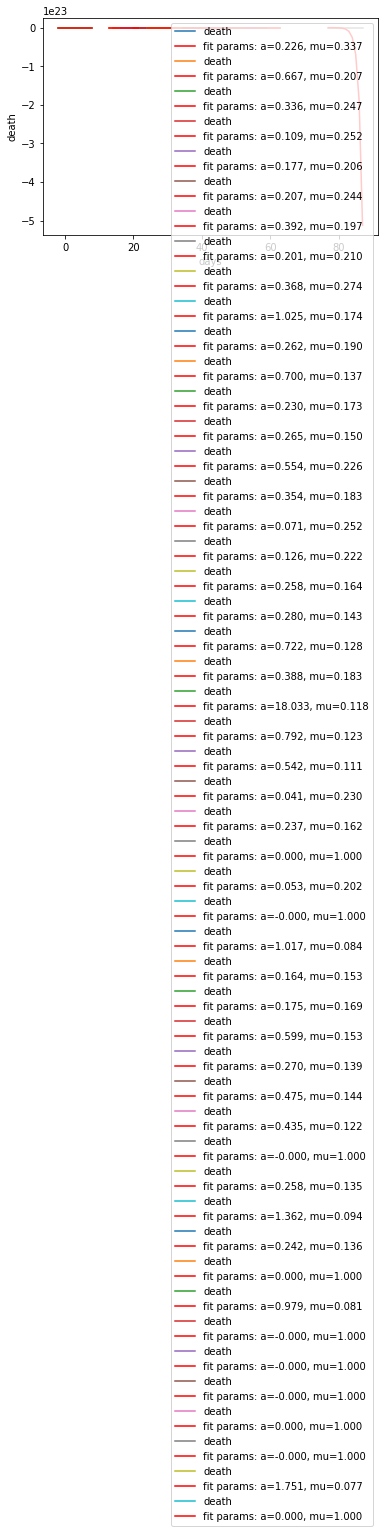

In [16]:
#figure out exponential rates for each state.
from scipy.optimize import curve_fit
def exponential(x, a, b):
    return a*np.exp(b*x)

#start at 10 cases
mincases = 10
dayextended = 10
#go for 10 days after
#can modify this to 20 days, to shelter date, etc

fitplotx=[]
fitploty=[]
xcheck=[]
ycheck=[]
mu=[]

for i in range(len(top)):
    #index dates when 10 cases then add on 10 days
    startdate=cz[(cz['state'] == top[i]) & (cz['death']>mincases)]['date'].tolist()[-1]
    enddate=startdate+datetime.timedelta(days=dayextended)
    
    #check single state
    #x=cz[(cz['state']=='UT') & (cz['date']>=startdate) & (cz['date']<=enddate)]['days'] 
    #y=cz[(cz['state']=='UT') & (cz['date']>=startdate) & (cz['date']<=enddate)]['death']
    
    
    x=cz[(cz['state']==top[i]) & (cz['date']>=startdate) & (cz['date']<=enddate)]['days'] 
    y=cz[(cz['state']==top[i]) & (cz['date']>=startdate) & (cz['date']<=enddate)]['death']
    
    
    popt, pcov = curve_fit(exponential, x, y)
    plt.plot(x,y)
    #print('state: ' + top[i])
    #print('mu: ' + str(popt[1]))
    #print(popt)
    #print(pcov)

    xfit=x
    yfit=exponential(xfit,*popt)
    xcheck.append(x)
    ycheck.append(y)
    
    fitplotx.append(xfit)
    fitploty.append(yfit)
    if popt[1]<0.9:  #check for unresasonable fits
        mu.append(popt[1])
    else:
        mu.append(0)
        print(top[i] + 'SUSPICIOUS MU VALUE. REPLACED WITH 0 FOR PLOT PURPOSES:  ' + str(popt[1]))
    
    plt.plot(xfit, yfit,'r',label='fit params: a=%5.3f, mu=%5.3f' %tuple(popt))
    plt.xlabel('days')
    plt.ylabel('death')
    plt.legend()
    
   # print(xcheck[5])
#print(ycheck[5])

#print(fitplotx[5])
#print(fitploty[5])
#
#print(mu)

In [18]:
fi5 = px.scatter(cz,x='days',y='positive',color='state')
fi5

In [17]:
import plotly.graph_objs as go
fig1fit = px.scatter(cz,x='days',y='death',color='state',log_y=True)
#fig1fit.add_trace(go.line(x=xfitplotx[0], y=xfitploty[0]))


In [19]:
data = dict(
        type = 'choropleth',
        colorscale = 'YlOrRd',
        locations = dz['state'],
        locationmode = "USA-states",
        z = dz['positive'],
        text = dz['state'],
        colorbar = {'title' : 'positive cases'},
      ) 

layout = dict(title = 'Positive Cases Per State',
        geo = {'scope':'usa'})


data2 = dict(
        type = 'choropleth',
        colorscale = 'YlOrRd',
        locations = dz['state'],
        locationmode = "USA-states",
        z = dz['death'],
        text = dz['state'],
        colorbar = {'title' : 'deaths'},
      ) 

layout2 = dict(title = 'Deaths Per State',
        geo = {'scope':'usa'})

data3 = dict(
        type = 'choropleth',
        colorscale = 'YlOrRd',
        locations = dz['state'],
        locationmode = "USA-states",
        z = dz['% population tested'],
        text = dz['state'],
        colorbar = {'title' : '% population tested'},
      ) 

layout3 = dict(title = '% population tested',
        geo = {'scope':'usa'})
'''
data4 = dict(
        type = 'choropleth',
        colorscale = 'Greens',
        locations = top,
        locationmode = "USA-states",
        z = mu,
        text = top,
        colorbar = {'title' : 'growth rate deaths'},
      ) 

layout4 = dict(title = 'growth rate deaths',
        geo = {'scope':'usa'})

'''

'\ndata4 = dict(\n        type = \'choropleth\',\n        colorscale = \'Greens\',\n        locations = top,\n        locationmode = "USA-states",\n        z = mu,\n        text = top,\n        colorbar = {\'title\' : \'growth rate deaths\'},\n      ) \n\nlayout4 = dict(title = \'growth rate deaths\',\n        geo = {\'scope\':\'usa\'})\n\n'

In [22]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)
choromap2 = go.Figure(data = [data2],layout = layout2)
iplot(choromap2,validate=False)
choromap3 = go.Figure(data = [data3],layout = layout3)
iplot(choromap3,validate=False)
'''choromap4 = go.Figure(data = [data4],layout = layout4)
iplot(choromap4,validate=False)
'''

'choromap4 = go.Figure(data = [data4],layout = layout4)\niplot(choromap4,validate=False)\n'

In [20]:
import plotly.io as pio
pio.write_html(fig1, file='positivextime.html', auto_open=True)  #positive over time
pio.write_html(fig2, file='deathxtime.html', auto_open=True)   #death over time
pio.write_html(fig1a, file='positivextimesemilog.html', auto_open=True)   #positive over time semilog
pio.write_html(fig2a, file='deathxtimesemilog.html', auto_open=True)   #death over time semilog


In [14]:
pio.write_html(fig1fit, file='mufit15.html', auto_open=True) #mufit for top 10 states

In [23]:
#pio.write_html(choromap4, file='mubystate.html', auto_open=True) #mufit for US in choropeth
pio.write_html(choromap3, file='percenttestedstate.html', auto_open=True) #%test for US in choropeth

In [19]:
#find out how many entries per state.
allstates=list(statesdf['state'].unique())  #extracts all states from statesdf
dicttop = dict.fromkeys(allstates, )  #puths them into a key value form.

for k,v in dicttop.items():
    dicttop[k]=statesdf[statesdf['state']==k]['hospitalizedCurrently'].count()

CuHosp = {k: v for k, v in sorted(dicttop.items(), key=lambda item: item[1])}

for k,v in dicttop.items():
    dicttop[k]=statesdf[statesdf['state']==k]['inIcuCurrently'].count()

CuIcu = {k: v for k, v in sorted(dicttop.items(), key=lambda item: item[1])}

for k,v in dicttop.items():
    dicttop[k]=statesdf[statesdf['state']==k]['onVentilatorCurrently'].count()

CuVen = {k: v for k, v in sorted(dicttop.items(), key=lambda item: item[1])}

'''for k,v in dicttop.items():
    dicttop[k]=statesdf[(statesdf['state']==k) &  (statesdf['hospitalizedCurrently']>0)]['date'].tolist()
    
firsttrackdate = {k: v for k, v in sorted(dicttop.items(), key=lambda item: item[1])}
'''
fulldict={k: {'Hospitalized': CuHosp[k], 'Icu': CuIcu[k],'Ventilator':CuVen[k]} for k in (CuHosp.keys() & CuIcu.keys()& CuVen.keys())}
fulldict

sightdf= pd.DataFrame(fulldict).transpose()

In [16]:
chosenstates=['AZ','ME','WA','IA','CA','IL','KY','VA','RI','WV','MI','NJ','WI','DC','MA','OR','OK','NY','MN']

#need to add in. If no stay at home orders, NO HIGHLIHGTING.
Good exercise but not very useful since there is no data before stay at home orders are enacted to a degree

Do the same but with Deaths Per Week/Per Day
Then do the same with



In [24]:
def stayhomestart(state):
    try:
        return(stayhomeorder.get(state).get('start'))
    except AttributeError:
        return(currentdate)
    
def stayhomeend(state):
    try:
        if stayhomeorder.get(state).get('end')<currentdate:
            return(stayhomeorder.get(state).get('end'))
        else:
            return(currentdate)
    except AttributeError:
        return(currentdate)
    
stayhomeend('IA')

datetime.datetime(2020, 6, 24, 7, 28, 35, 300590)

In [51]:
#cumultaive positive/deaths versus time


for i in range(len(chosenstates)):


        #______________________________--Plotly--______________________________________


        color1 = '#00bfff'
        color2 = '#ff4000'

        trace1 = go.Scatter(
            x = statesdf[statesdf['state']==chosenstates[i]]['date'],
            y = statesdf[statesdf['state']==chosenstates[i]]['hospitalizedCurrently'],
            name='Currently Hospitalized',
            marker=dict(
                color=color1
            )

        )
        trace2 = go.Scatter(
            x = statesdf[statesdf['state']==chosenstates[i]]['date'],
            y = statesdf[statesdf['state']==chosenstates[i]]['inIcuCurrently'],
            name='Currently in ICU'

        )
        data = [trace1, trace2]
        layout = go.Layout(
            title= ('State: '+str(chosenstates[i])),
            xaxis_title="date",
            yaxis_title="currently hospitalized or in ICU",
        shapes=[
            # 1st highlight during Feb 4 - Feb 6
            dict(
                type='rect',
                # x-reference is assigned to the x-values
                xref='x',
                # y-reference is assigned to the plot paper [0,1]
                yref='paper',
                x0=stayhomestart(chosenstates[i]),
                y0=0,
                x1=stayhomeend(chosenstates[i]),
                y1=1,
                fillcolor='LightSalmon',
                opacity=0.2,
                line_width=0,
            )
        ]


        )
        flattenthecurve2 = go.Figure(data=data, layout=layout)
        flattenthecurve2.show()
        pio.write_html(flattenthecurve2, file='flattenthecurve2'+chosenstates[i]+'.html', auto_open=False)
        
        #plotly.offline.plot(flattenthecurve, filename='Chart_'+chosenstates[i]+'.html',auto_open=False)
    



In [53]:
#NEW deaths/positive per day

for i in range(len(chosenstates)):


        #______________________________--Plotly--______________________________________


        color1 = '#00bfff'
        color2 = '#ff4000'

        trace1 = go.Bar(
            x = statesdf[statesdf['state']==chosenstates[i]]['date'],
            y = statesdf[statesdf['state']==chosenstates[i]]['new deaths per capita'],
            name='deaths'
        )
        data = trace1
        layout = go.Layout(
            title= ('State: '+str(chosenstates[i])
                   ),
            xaxis_title="date",
            yaxis_title="daily deaths per 1M",
        shapes=[
            # 1st highlight during Feb 4 - Feb 6
            dict(
                type='rect',
                # x-reference is assigned to the x-values
                xref='x',
                # y-reference is assigned to the plot paper [0,1]
                yref='paper',
                x0=stayhomestart(chosenstates[i]),
                y0=0,
                x1=stayhomeend(chosenstates[i]),
                y1=1,
                fillcolor='LightSalmon',
                opacity=0.2,
                line_width=0,
            )
        ]


        )
        flattenthecurve3 = go.Figure(data=data, layout=layout)
        flattenthecurve3.show()
        pio.write_html(flattenthecurve3, file='deathspercapita'+chosenstates[i]+'.html', auto_open=False)
        
        #plotly.offline.plot(flattenthecurve, filename='Chart_'+chosenstates[i]+'.html',auto_open=False)
    


In [37]:
pio.write_html(flattenthecurve2, file='flattenthecurve2.html', auto_open=True)   #Total Hospitalized and ICU with salmon 
pio.write_html(flattenthecurve3, file='deathspercapita.html', auto_open=False)   #bar chart


In [25]:
def plotcurve(name, y, ax):
    ax.set_title(name)
    #ax.set_xlim(left='2020-03-04')
    ax.plot(y['date'],y['hospitalizedCurrently'],marker='o',label='hospitalized')
    ax.plot(y['date'],y['inIcuCurrently'],marker='x',label='in ICU')
    ax.set_xlim(left='2020-03-04',right=currentdate)
    ax.set_xticklabels(y['date'],rotation=45)
   
    ax.legend()

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.fill_between(y['date'], 0, 1, where= (y['date'] > stayhomestart(name)) & (y['date'] < stayhomeend(name)),
                color='salmon', alpha=0.5, transform=ax.get_xaxis_transform())

In [19]:
statesdf['state'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



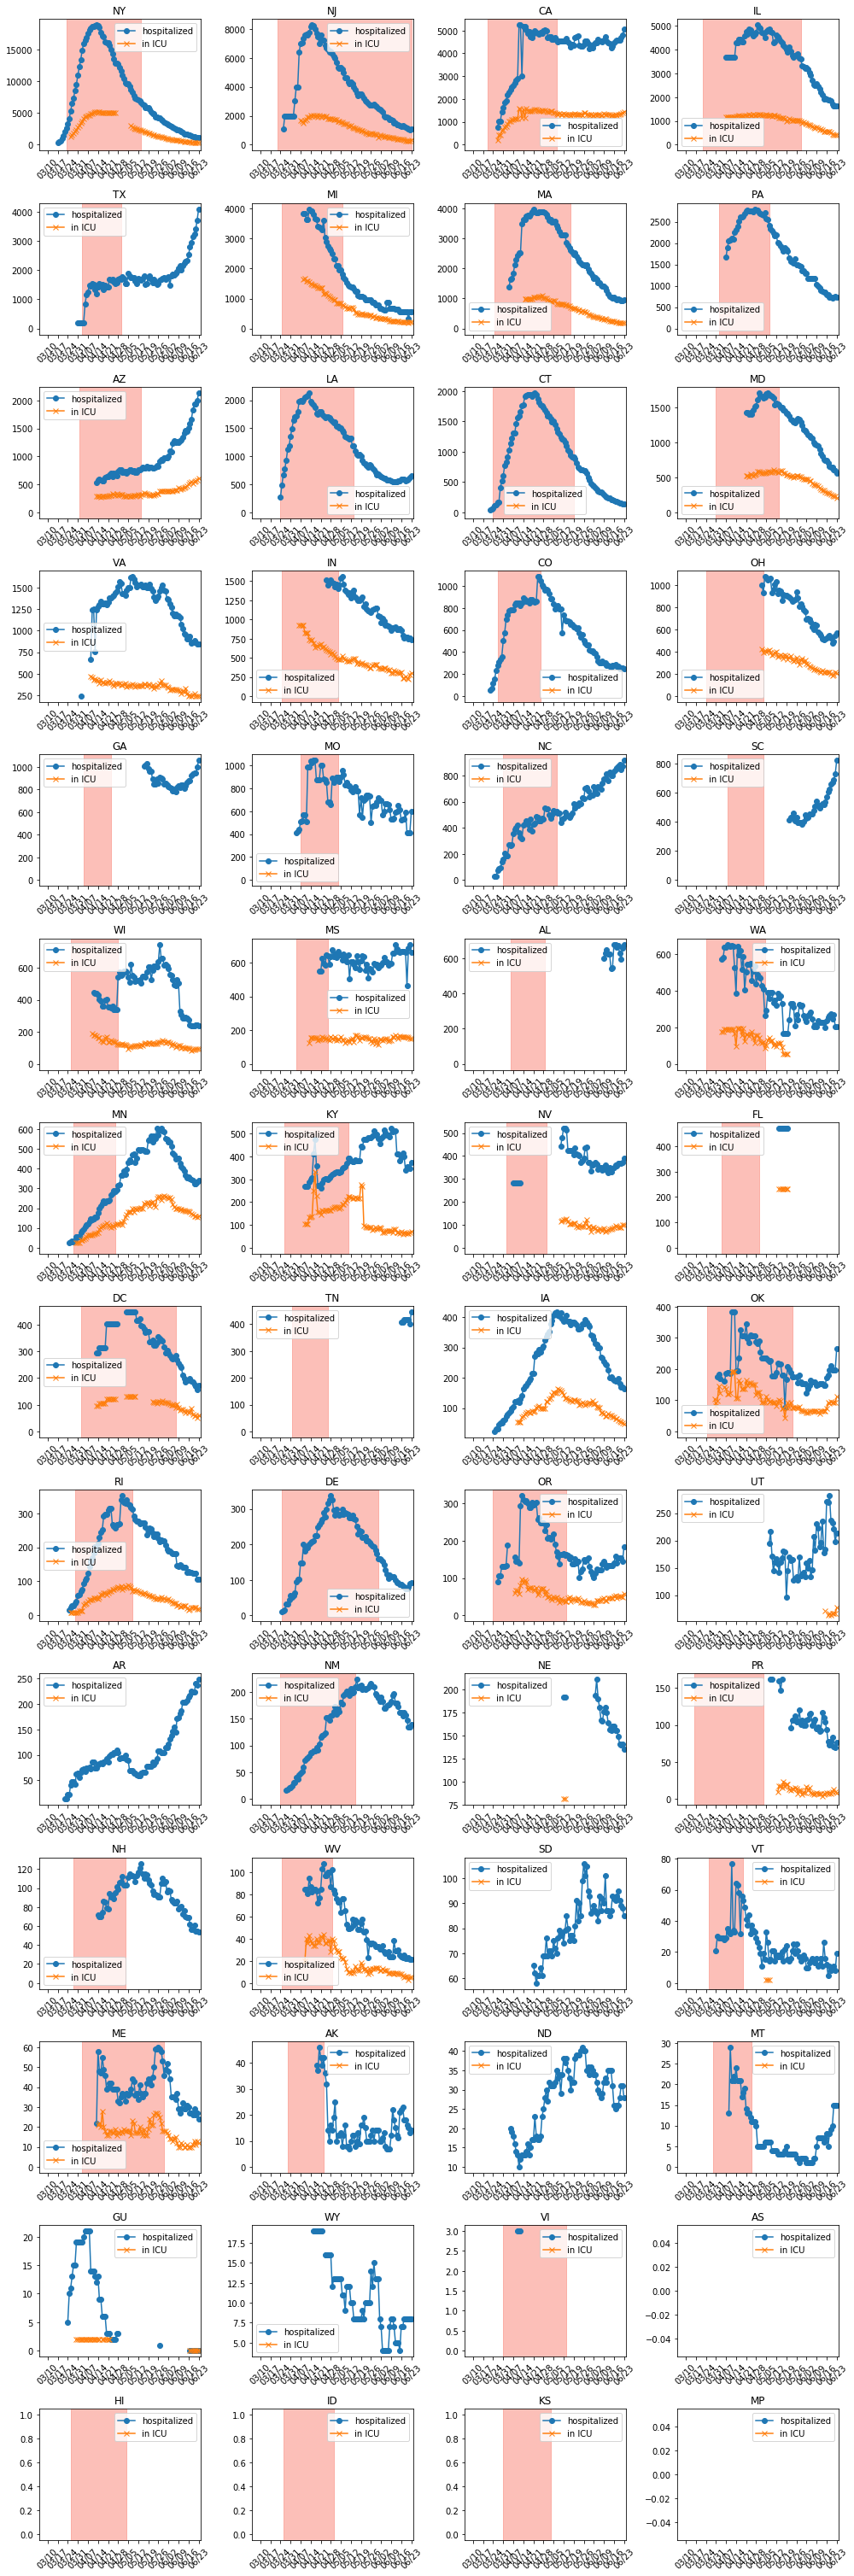

In [26]:
#Based on this lets use the states
chosenstates=list(statesdf.sort_values(by=['hospitalizedCurrently'],ascending=False)['state'].unique())

ncols = 4
nrows = int(np.ceil(len(chosenstates) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(14, nrows*3))
   
for ax,i in zip(axes.flat, chosenstates):
    
    plotcurve(i, statesdf[statesdf['state']==i],ax)
        

fig.tight_layout()
fig.set_facecolor('w')
fig.savefig('flattenthecurve.png')

In [27]:
def plotcurve2(name, y, ax):
    rolling_mean = y['new deaths per capita'].rolling(window=7).mean()
    
    ax.set_title(name)
    #ax.set_xlim(left='2020-03-04')
    ax.bar(y['date'],y['new deaths per capita'],label='daily deaths per capita',color='dodgerblue')
    ax.plot(y['date'],rolling_mean,label='7 day moving average',color='black')
    ax.set_xlim(left='2020-03-04',right=currentdate)
    ax.set_ylim(bottom=0)
    ax.set_xticklabels(y['date'],rotation=45)
   
    ax.legend()

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.fill_between(y['date'], 0, 1, where= (y['date'] > stayhomestart(name)) & (y['date'] < stayhomeend(name)),
                color='salmon', alpha=0.5, transform=ax.get_xaxis_transform())

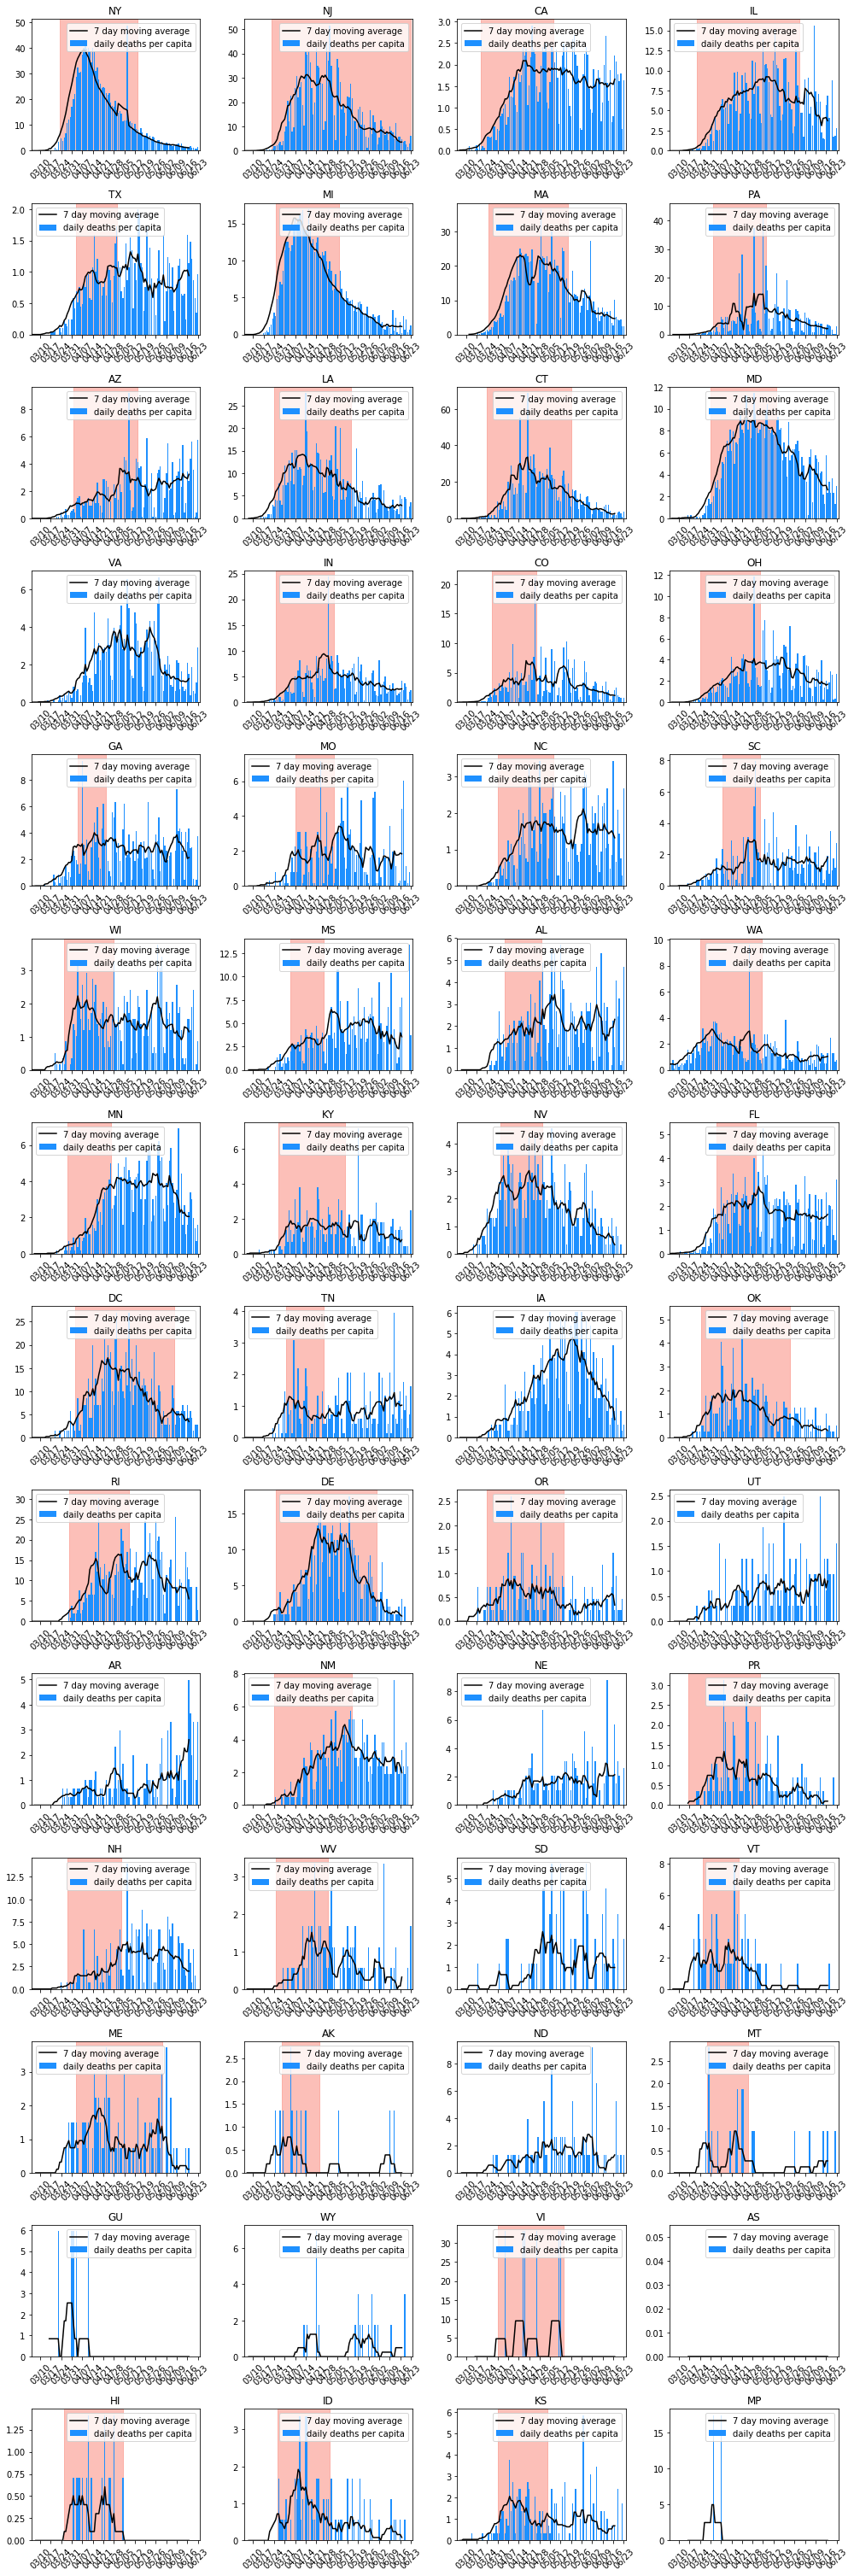

In [28]:
#Based on this lets use the states
chosenstates=list(statesdf.sort_values(by=['hospitalizedCurrently'],ascending=False)['state'].unique())
#chosenstates=['NY','CA','NJ','VT']



ncols = 4
nrows = int(np.ceil(len(chosenstates) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(14, nrows*3))
   
for ax,i in zip(axes.flat, chosenstates):
    plotcurve2(i, statesdf[statesdf['state']==i],ax)

        

fig.tight_layout()
fig.set_facecolor('w')
fig.savefig('deathspercapita.png')

In [29]:
#%positive / tested per week

def plotcurve3(name, y, ax):
   # rolling_mean = y['new deaths per capita'].rolling(window=7).mean()
    
    
    
    
    ax.set_title(name)
    #ax.set_xlim(left='2020-03-04')
    p1 =ax.bar(y['date'],y['% positive over tested'],label='% positive',color='green')
   
    ax.set_xlim(left='2020-03-04',right=currentdate)
    ax.set_ylim(bottom=0,top=100)
    
    ax.set_xticklabels(y['date'],rotation=45)
    ax.set_ylabel("% positive over tested")
   
    ax2 = ax.twinx()
    p2=ax2.plot(y['date'],y['% population tested'],label='% population tested',color='black')
    ax2.set_ylim(bottom=0, top=20)
    #ax2.set_ylabel("% population tested")
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.fill_between(y['date'], 0, 1, where= (y['date'] > stayhomestart(name)) & (y['date'] < stayhomeend(name)),
                color='salmon', alpha=0.5, transform=ax.get_xaxis_transform())
    #ps=[p1,p2]
    #ls=['% positive','% population tested']
    #ax.legend(handles=ps,labels=ls)
    ax.legend
    
    #cant get the the secondary axis to show on legend


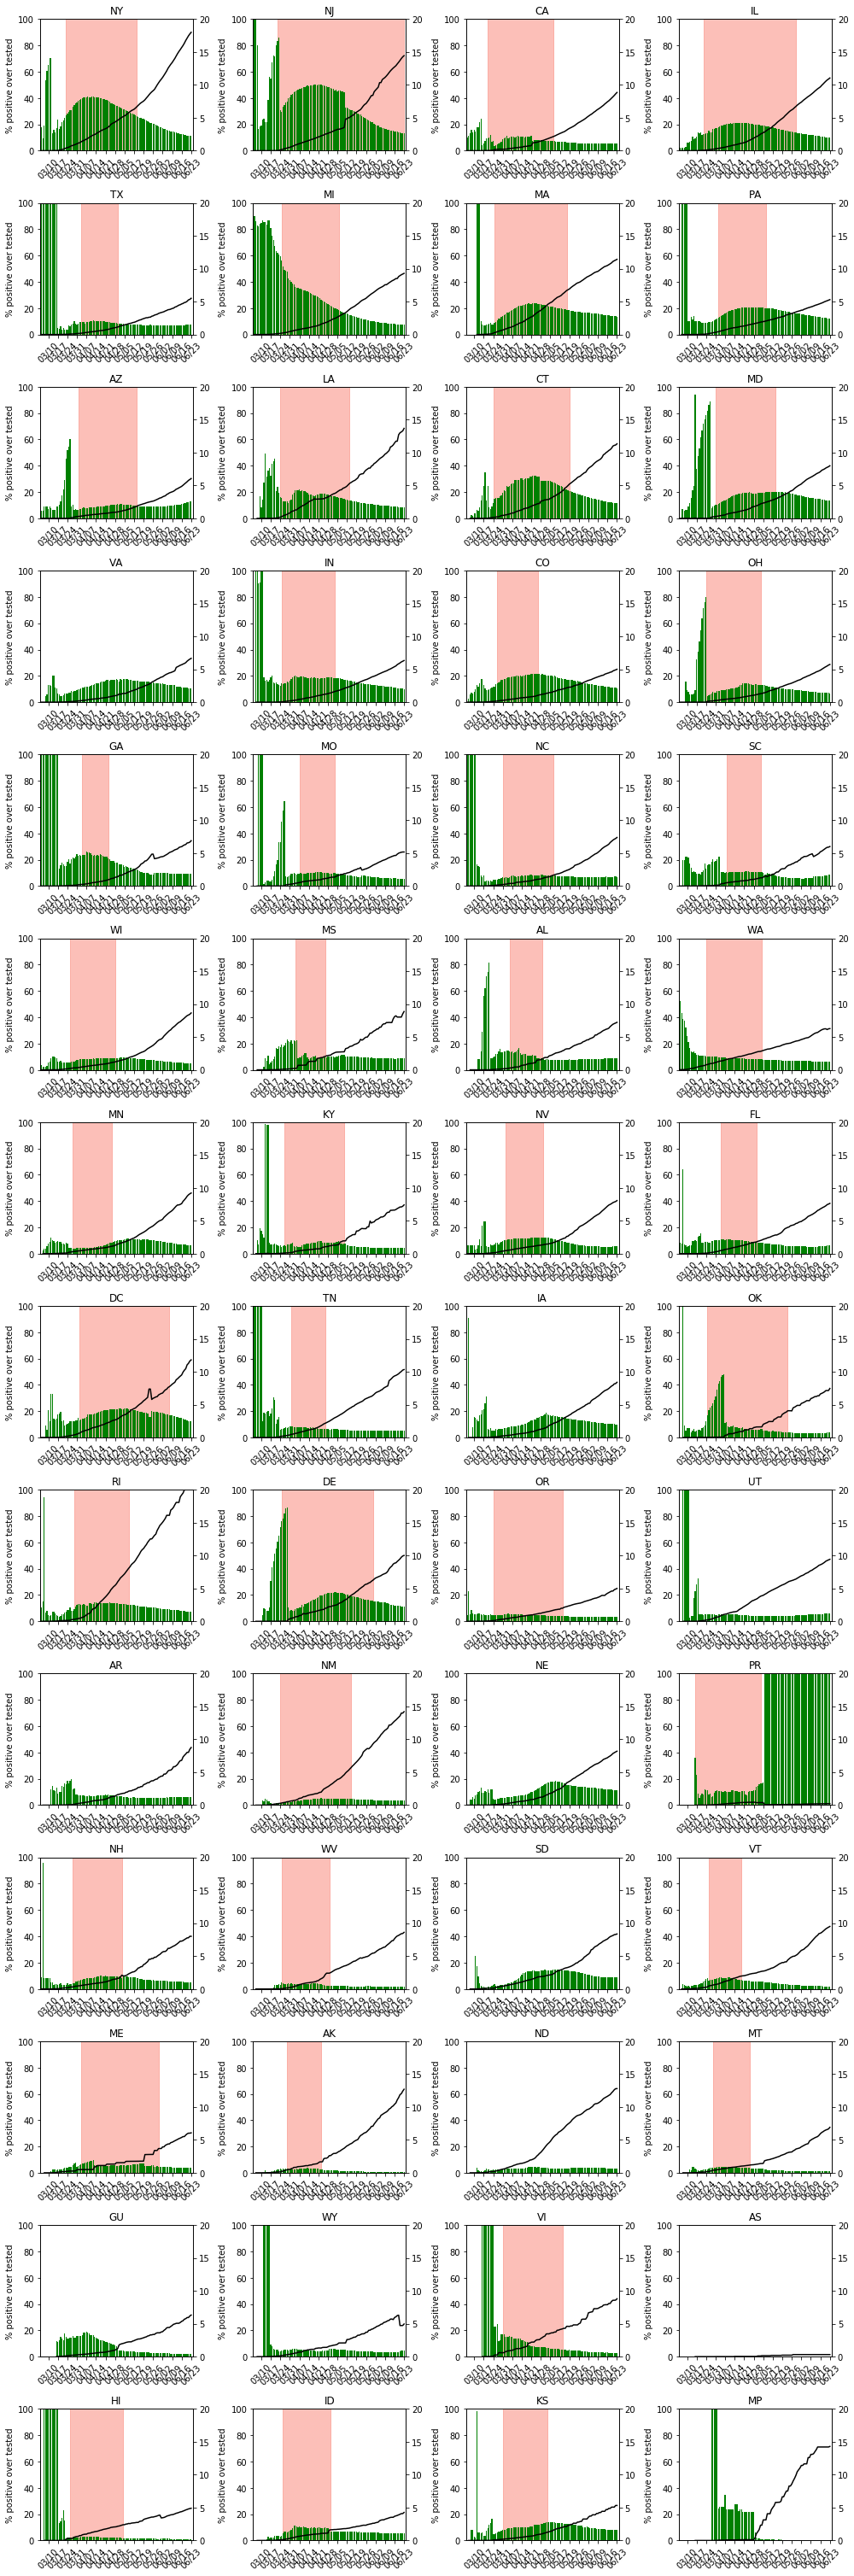

In [30]:
#Based on this lets use the states
chosenstates=list(statesdf.sort_values(by=['hospitalizedCurrently'],ascending=False)['state'].unique())
#chosenstates=['NY','CA','NJ','VT']

ncols = 4
nrows = int(np.ceil(len(chosenstates) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(14, nrows*3))
   
for ax,i in zip(axes.flat, chosenstates):
    plotcurve3(i, statesdf[statesdf['state']==i],ax)

        

fig.tight_layout()
fig.set_facecolor('w')
fig.savefig('positiveovertestedperweek.png')

In [21]:
'''
fig11 = px.line(cz,y='% positive over tested',x='% population tested',color='state', title='% positive over tested v % population tested')

fig11.update_layout(
    showlegend=True,
    )
fig11.show()

fig12 = px.line(cz,y='% death over positive',x='% population tested',color='state', title='% death over positive v % population tested')

fig12.update_layout(
    showlegend=True,
    yaxis = dict(
      range=[0,10]
    )
)
fig12.show()

'''
fig14 = px.scatter(dz,y='% positive over tested',x='% population tested',text='state',size='positive', title='% positive over tested v % population tested')

fig14.update_layout(
    showlegend=True,
    yaxis = dict(
      range=[0,50]
    )
)
fig14.show()
       
       
       

In [24]:
'''pio.write_html(fig11, file='percentpositivepercenttested.html', auto_open=True)   #%positive vs % tested 
pio.write_html(fig12, file='percentdeathpercenttestedline.html', auto_open=True)   #%deaths v positive line 
'''
pio.write_html(fig14, file='percentpositivebubble.html', auto_open=True)   #%deaths v positive bubble

TODO:
Add End of Stay at home orders